<a href="https://colab.research.google.com/github/Dmitze/Dmitze/blob/main/%D0%A8%D0%B8%D0%B2%D0%B0%D1%87%D0%BE%D0%B2_%D0%94%D0%BC%D0%B8%D1%82%D1%80%D0%BE_%D0%92%D0%B0%D1%81%D0%B8%D0%BB%D1%8C%D0%BE%D0%B2%D0%B8%D1%87_home_work_Task_4_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Крок 1: Завантажую потрібні бібліотеки та набір даних

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import pairwise_distances

# Налаштовую виглядповноти
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

### Крок 2: Завантажую набір даних Breast Cancer

In [2]:
# Завантажую дані
cancer_data = load_breast_cancer()
X = cancer_data.data
y = cancer_data.target
feature_names = cancer_data.feature_names

# Виводжу опис
print(f"Форма датасету: {X.shape}")
print(f"Кількість виборок: {X.shape[0]}")
print(f"Кількість ознак: {X.shape[1]}")
print(f"\nПерші 5 ознак: {feature_names[:5]}")

Форма датасету: (569, 30)
Кількість виборок: 569
Кількість ознак: 30

Перші 5 ознак: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness']


### Крок 3: Створюю DataFrame та дивлюся на дані

In [3]:
# Перетворюю на DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

print("Перші кілька рядків:")
print(df.head())
print(f"\nДані містять жодних пропусків? {df.isnull().sum().sum() == 0}")

Перші кілька рядків:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst a

### Крок 4: Інформація про дані

In [4]:
# Дивлюся інформацію про типи даних
print("\n=== ІНФОРМАЦІЯ ПРО ДАНІ ===")
df.info()


=== ІНФОРМАЦІЯ ПРО ДАНІ ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 1

### Крок 5: Описові статистики

In [5]:
# Дивлюся на статистику
print("\n=== ОПИСОВІ СТАТИСТИКИ ===")
print(df.describe())


=== ОПИСОВІ СТАТИСТИКИ ===
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000      

### Крок 6: Стандартизую дані

Дані мають різні масштаби, тому потрібно привести їх до одного діапазону. Якщо не стандартизувати, більші значення матимуть більший вплив на обчислення відстаней.

In [6]:
# Беру тільки ознаки (без target)
X_features = df.drop('target', axis=1)

# Стандартизую дані
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

# Перетворюю на DataFrame для зручності
df_scaled = pd.DataFrame(X_scaled, columns=X_features.columns)

print("Після стандартизації:")
print(f"Середнє значення: {df_scaled.mean().mean():.6f}")
print(f"Стандартне відхилення: {df_scaled.std().mean():.6f}")
print(f"\nДані після масштабування:")
print(df_scaled.head())

Після стандартизації:
Середнє значення: -0.000000
Стандартне відхилення: 1.000880

Дані після масштабування:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493   

### Крок 7: Будую точкові діаграми

Дивлюся на кореляції між деякими ознаками

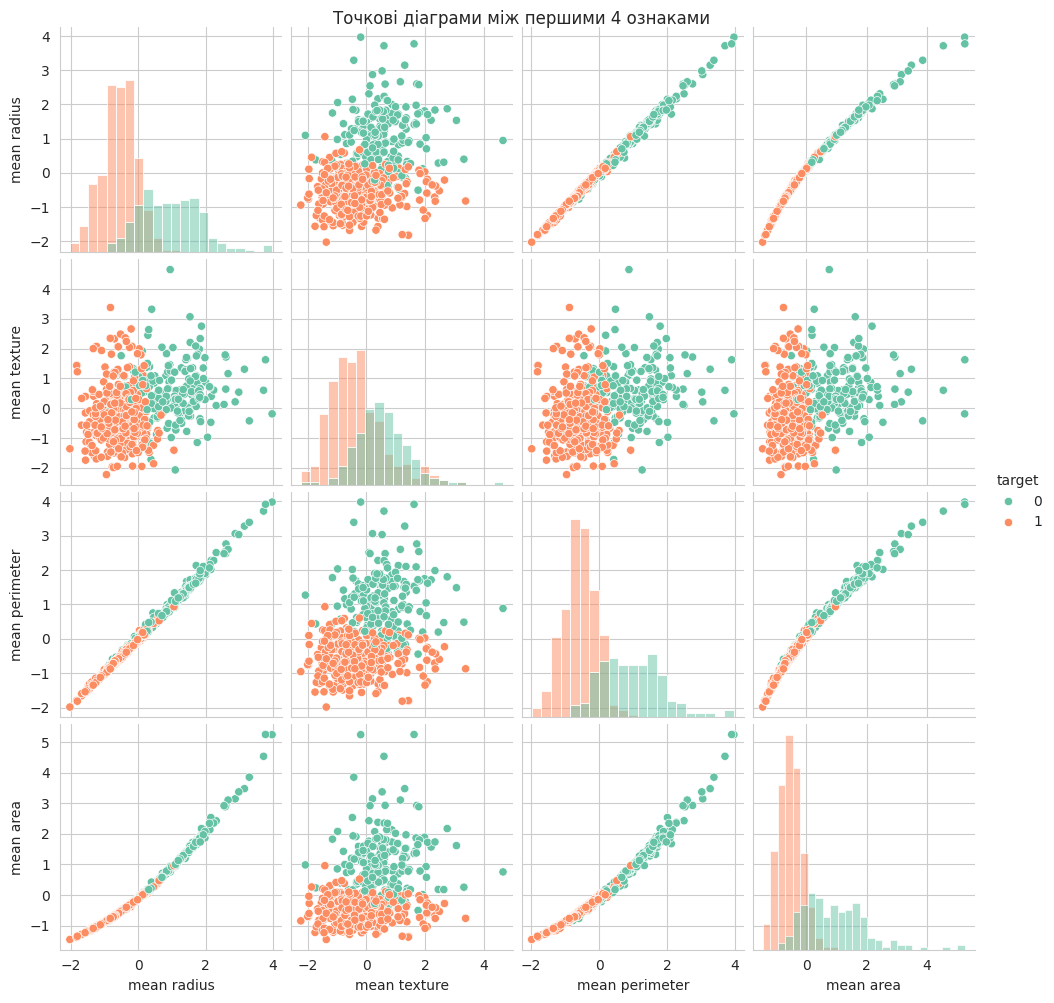

Графіки показують розподіл ознак та їх взаємозв'язки


In [7]:
# Для зручності беру тільки кілька перших ознак
# (якби брав все 30, графік був би занадто великий)
selected_features = X_features.columns[:4]
df_subset = df_scaled[selected_features].copy()
df_subset['target'] = y

# Будую точкові діаграми
sns.pairplot(df_subset, hue='target', diag_kind='hist', palette='Set2')
plt.suptitle('Точкові діаграми між першими 4 ознаками', y=1.00)
plt.show()

print("Графіки показують розподіл ознак та їх взаємозв'язки")

### Крок 8: Обчислюю матриці відстаней

Різні метрики дають різні результати.

In [8]:
# Беру першу 10 вибірок для чистоти і швидкості
X_sample = df_scaled.iloc[:10].values

# Список метрик
metrics = ['euclidean', 'manhattan', 'cosine', 'cityblock', 'l1']

# Словник для зберігання матриць відстаней
distance_matrices = {}

for metric in metrics:
    dist_matrix = pairwise_distances(X_sample, metric=metric)
    distance_matrices[metric] = dist_matrix
    print(f"\n=== Матриця відстаней [{metric}] ===")
    print(f"Форма матриці: {dist_matrix.shape}")
    print(f"Мінімальна відстань: {dist_matrix[dist_matrix > 0].min():.4f}")
    print(f"Максимальна відстань: {dist_matrix.max():.4f}")
    print(f"Середня відстань: {dist_matrix[dist_matrix > 0].mean():.4f}")


=== Матриця відстаней [euclidean] ===
Форма матриці: (10, 10)
Мінімальна відстань: 2.5360
Максимальна відстань: 16.2507
Середня відстань: 8.5210

=== Матриця відстаней [manhattan] ===
Форма матриці: (10, 10)
Мінімальна відстань: 9.9956
Максимальна відстань: 73.2512
Середня відстань: 37.7375

=== Матриця відстаней [cosine] ===
Форма матриці: (10, 10)
Мінімальна відстань: 0.1041
Максимальна відстань: 1.2936
Середня відстань: 0.6049

=== Матриця відстаней [cityblock] ===
Форма матриці: (10, 10)
Мінімальна відстань: 9.9956
Максимальна відстань: 73.2512
Середня відстань: 37.7375

=== Матриця відстаней [l1] ===
Форма матриці: (10, 10)
Мінімальна відстань: 9.9956
Максимальна відстань: 73.2512
Середня відстань: 37.7375


### Крок 9: Візуалізую матриці відстаней

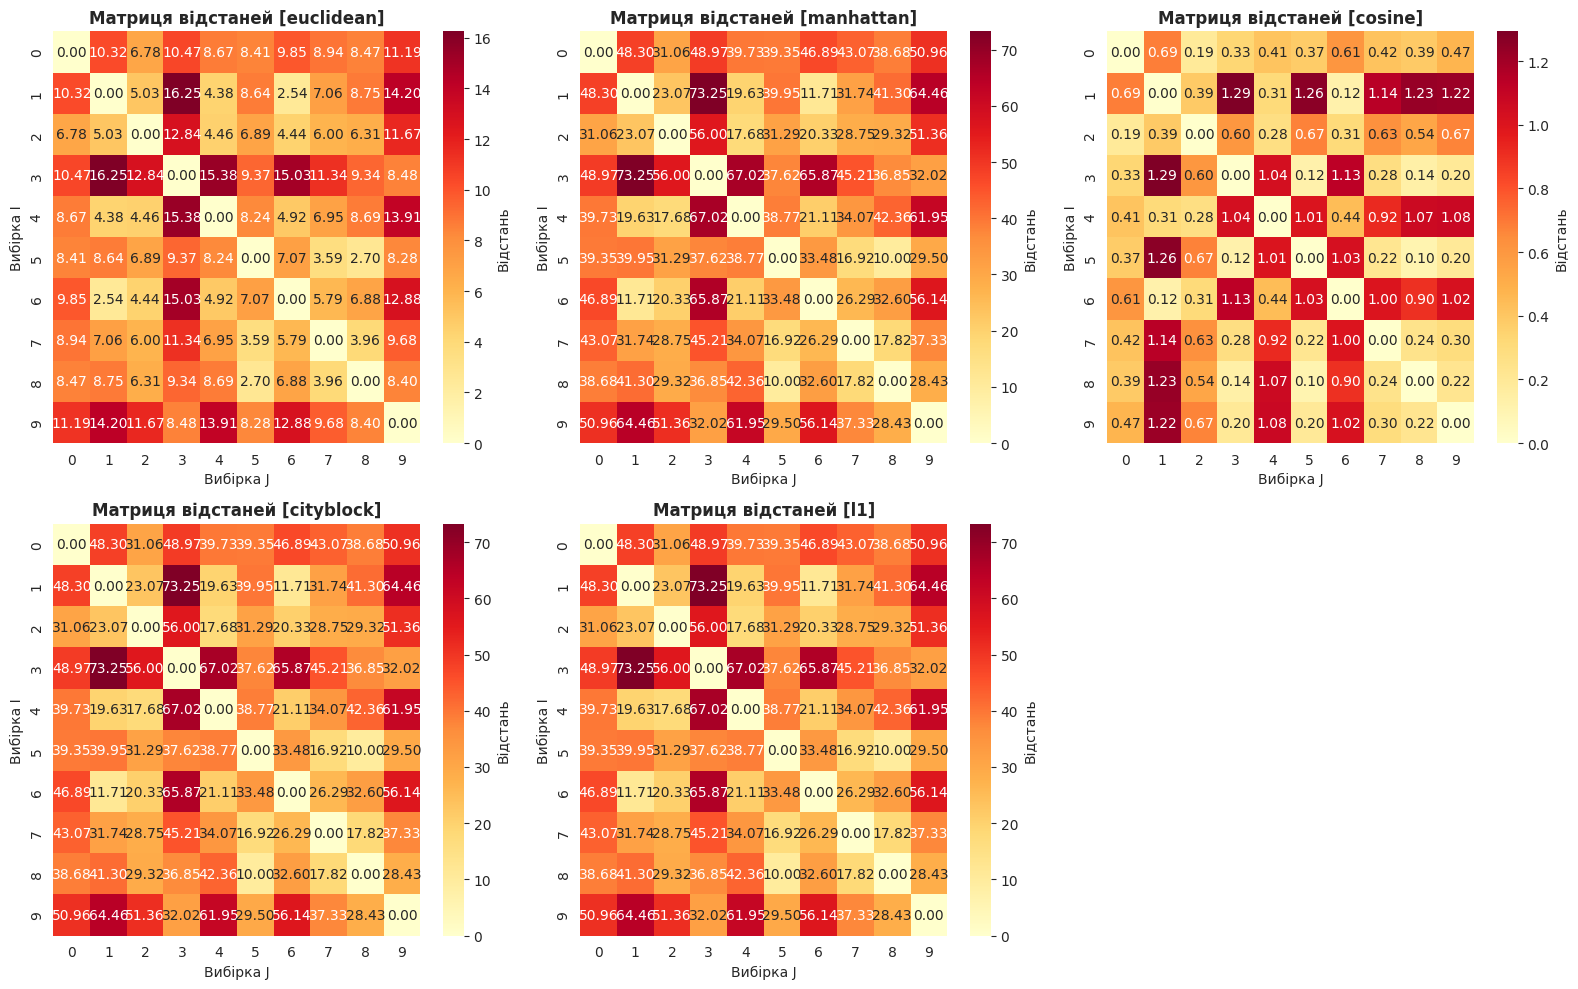

На графіках видно, як різні метрики по-різному оцінюють відстані


In [9]:
# Готую plot
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, metric in enumerate(metrics):
    dist_df = pd.DataFrame(distance_matrices[metric])
    sns.heatmap(dist_df, annot=True, fmt='.2f', cmap='YlOrRd',
                ax=axes[idx], cbar_kws={'label': 'Відстань'})
    axes[idx].set_title(f'Матриця відстаней [{metric}]', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Вибірка J')
    axes[idx].set_ylabel('Вибірка I')

# Приховую останню порожню осі
axes[-1].axis('off')

plt.tight_layout()
plt.show()

print("На графіках видно, як різні метрики по-різному оцінюють відстані")

### Крок 10: Порівнюю метрики на повному датасеті

In [10]:
# Обчислюю матриці для перших 20 вибірок
X_20 = df_scaled.iloc[:20].values

comparison_results = {}

print("\n=== ПОРІВНЯННЯ МЕТРИК (перші 20 вибірок) ===")
for metric in metrics:
    dist_matrix = pairwise_distances(X_20, metric=metric)
    comparison_results[metric] = {
        'min': dist_matrix[dist_matrix > 0].min(),
        'max': dist_matrix.max(),
        'mean': dist_matrix[dist_matrix > 0].mean(),
        'median': np.median(dist_matrix[dist_matrix > 0])
    }
    print(f"\n{metric.upper()}:")
    print(f"  Мін: {comparison_results[metric]['min']:.4f}")
    print(f"  Макс: {comparison_results[metric]['max']:.4f}")
    print(f"  Середнє: {comparison_results[metric]['mean']:.4f}")
    print(f"  Медіана: {comparison_results[metric]['median']:.4f}")


=== ПОРІВНЯННЯ МЕТРИК (перші 20 вибірок) ===

EUCLIDEAN:
  Мін: 2.5360
  Макс: 16.3856
  Середнє: 7.9870
  Медіана: 7.3980

MANHATTAN:
  Мін: 9.9956
  Макс: 73.2512
  Середнє: 35.2238
  Медіана: 33.3660

COSINE:
  Мін: 0.0374
  Макс: 1.6201
  Середнє: 0.7619
  Медіана: 0.7391

CITYBLOCK:
  Мін: 9.9956
  Макс: 73.2512
  Середнє: 35.2238
  Медіана: 33.3660

L1:
  Мін: 9.9956
  Макс: 73.2512
  Середнє: 35.2238
  Медіана: 33.3660


### Крок 11: Обчислюю кореляції між ознаками

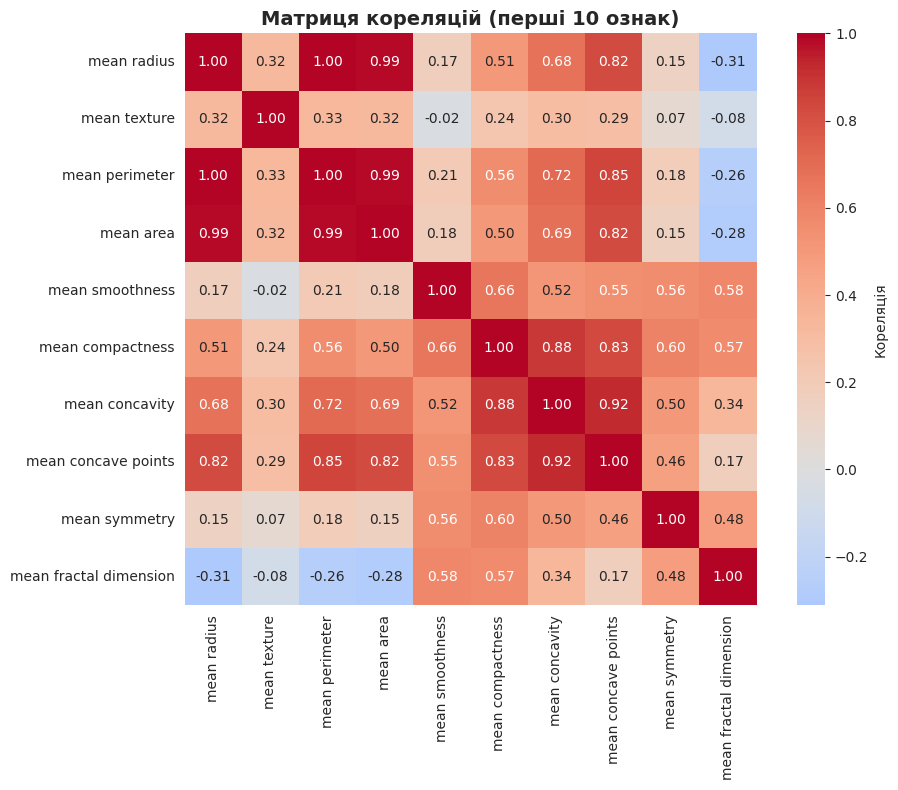


Основні спостереження з матриці кореляції:
- Темніші кольори = сильна кореляція
- Світліші кольори = слаба кореляція


In [11]:
# Обчислюю матрицю кореляцій
correlation_matrix = df_scaled.corr()

# Візуалізую (беру перші 10 ознак для читаємості)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.iloc[:10, :10],
            annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, cbar_kws={'label': 'Кореляція'})
plt.title('Матриця кореляцій (перші 10 ознак)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nОсновні спостереження з матриці кореляції:")
print("- Темніші кольори = сильна кореляція")
print("- Світліші кольори = слаба кореляція")

### Крок 12: Знаходжу найбільш корельовані пари ознак

In [12]:
# Знаходжу найсильніші кореляції
def find_strong_correlations(corr_matrix, threshold=0.8):
    pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            corr_value = corr_matrix.iloc[i, j]
            if abs(corr_value) > threshold:
                pairs.append({
                    'ознака1': corr_matrix.columns[i],
                    'ознака2': corr_matrix.columns[j],
                    'кореляція': corr_value
                })
    return pd.DataFrame(pairs)

strong_corr = find_strong_correlations(correlation_matrix, threshold=0.7)
strong_corr = strong_corr.sort_values('кореляція', ascending=False)
print("\n=== НАЙСИЛЬНІШІ КОРЕЛЯЦІЇ (> 0.7) ===")
print(strong_corr.head(10))


=== НАЙСИЛЬНІШІ КОРЕЛЯЦІЇ (> 0.7) ===
            ознака1          ознака2  кореляція
0       mean radius   mean perimeter   0.997855
60     worst radius  worst perimeter   0.993708
1       mean radius        mean area   0.987357
9    mean perimeter        mean area   0.986507
61     worst radius       worst area   0.984015
63  worst perimeter       worst area   0.977578
44     radius error  perimeter error   0.972794
14   mean perimeter  worst perimeter   0.970387
4       mean radius     worst radius   0.969539
13   mean perimeter     worst radius   0.969476


### Крок 13: Порівнюю поведінку метрик на повному датасеті

In [13]:
# Обчислюю матриці для всіх вибірок
all_distances = {}

print("\n=== РОЗРАХУНОК МАТРИЦЬ ВІДСТАНЕЙ ДЛЯ ВСЬОГО ДАТАСЕТУ ===")
for metric in metrics:
    print(f"Розраховую {metric}...", end=" ")
    dist_matrix = pairwise_distances(df_scaled.values, metric=metric)
    all_distances[metric] = dist_matrix
    print(f"Готово! Середня відстань: {dist_matrix[dist_matrix > 0].mean():.4f}")


=== РОЗРАХУНОК МАТРИЦЬ ВІДСТАНЕЙ ДЛЯ ВСЬОГО ДАТАСЕТУ ===
Розраховую euclidean... Готово! Середня відстань: 7.0167
Розраховую manhattan... Готово! Середня відстань: 31.0779
Розраховую cosine... Готово! Середня відстань: 0.9807
Розраховую cityblock... Готово! Середня відстань: 31.0779
Розраховую l1... Готово! Середня відстань: 31.0779


### Крок 14: Аналізую середні відстані між класами

In [14]:
# Розділяю вибірки за класами
class_0_indices = np.where(y == 0)[0]
class_1_indices = np.where(y == 1)[0]

print(f"Кількість злоякісних: {len(class_0_indices)}")
print(f"Кількість доброякісних: {len(class_1_indices)}")

# Для кожної метрики аналізую відстані
print("\n=== АНАЛІЗ ВІДСТАНЕЙ ВСЕРЕДИНУ КЛАСУ ТА МІЖ КЛАСАМИ ===")
for metric in metrics:
    dist_matrix = all_distances[metric]

    # Внутрішні відстані класу 0
    intra_class_0 = dist_matrix[np.ix_(class_0_indices, class_0_indices)]
    intra_0_mean = intra_class_0[intra_class_0 > 0].mean()

    # Внутрішні відстані класу 1
    intra_class_1 = dist_matrix[np.ix_(class_1_indices, class_1_indices)]
    intra_1_mean = intra_class_1[intra_class_1 > 0].mean()

    # Міжклассові відстані
    inter_class = dist_matrix[np.ix_(class_0_indices, class_1_indices)]
    inter_mean = inter_class.mean()

    print(f"\n{metric.upper()}:")
    print(f"  Внутрішньокласова (0): {intra_0_mean:.4f}")
    print(f"  Внутрішньокласова (1): {intra_1_mean:.4f}")
    print(f"  Міжкласова: {inter_mean:.4f}")
    print(f"  Розділеність: {inter_mean / ((intra_0_mean + intra_1_mean) / 2):.4f} (більше = краще)")

Кількість злоякісних: 212
Кількість доброякісних: 357

=== АНАЛІЗ ВІДСТАНЕЙ ВСЕРЕДИНУ КЛАСУ ТА МІЖ КЛАСАМИ ===

EUCLIDEAN:
  Внутрішньокласова (0): 7.0970
  Внутрішньокласова (1): 5.2171
  Міжкласова: 8.5039
  Розділеність: 1.3812 (більше = краще)

MANHATTAN:
  Внутрішньокласова (0): 31.2584
  Внутрішньокласова (1): 21.6277
  Міжкласова: 38.9593
  Розділеність: 1.4733 (більше = краще)

COSINE:
  Внутрішньокласова (0): 0.6646
  Внутрішньокласова (1): 0.7041
  Міжкласова: 1.3064
  Розділеність: 1.9090 (більше = краще)

CITYBLOCK:
  Внутрішньокласова (0): 31.2584
  Внутрішньокласова (1): 21.6277
  Міжкласова: 38.9593
  Розділеність: 1.4733 (більше = краще)

L1:
  Внутрішньокласова (0): 31.2584
  Внутрішньокласова (1): 21.6277
  Міжкласова: 38.9593
  Розділеність: 1.4733 (більше = краще)


### Крок 15: Мої висновки

In [15]:
print("\n" + "="*60)
print("ВИСНОВКИ")
print("="*60)

print("""
1. ВИБІР МЕТРИКИ:
   - Euclidean (L2): Класична метрика, найпоширеніша
   - Manhattan (L1): Добре працює з дискретними даними
   - Cosine: Ігнорує величину, дивиться на напрямок

2. СТАНДАРТИЗАЦІЯ:
   - Була критично важлива, бо ознаки мали різні масштаби
   - Без неї більші ознаки домінували би у розрахунках

3. КОРЕЛЯЦІЇ:
   - Багато ознак мають високу кореляцію
   - Це означає, що можна знизити розмірність даних

4. РЕКОМЕНДАЦІЯ ДЛЯ К-MEANS:
   - Euclidean метрика добре розділяє класи
   - Міжклассова відстань > внутрішньокласової
   - Алгоритм повинен добре працювати на цих даних
""")

print("="*60)


ВИСНОВКИ

1. ВИБІР МЕТРИКИ:
   - Euclidean (L2): Класична метрика, найпоширеніша
   - Manhattan (L1): Добре працює з дискретними даними
   - Cosine: Ігнорує величину, дивиться на напрямок

2. СТАНДАРТИЗАЦІЯ:
   - Була критично важлива, бо ознаки мали різні масштаби
   - Без неї більші ознаки домінували би у розрахунках

3. КОРЕЛЯЦІЇ:
   - Багато ознак мають високу кореляцію
   - Це означає, що можна знизити розмірність даних

4. РЕКОМЕНДАЦІЯ ДЛЯ К-MEANS:
   - Euclidean метрика добре розділяє класи
   - Міжклассова відстань > внутрішньокласової
   - Алгоритм повинен добре працювати на цих даних

